In [1]:
import pandas as pd
import numpy as np

<h2> Getting data from Github Repository by Johns Hopkins CSSE

In [2]:
meta = ["recovered", "confirmed","deaths"]
data = [pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv".format(i),error_bad_lines=False)  for i in meta]

<H2> Defining countries in scope

In [3]:
scope = ["Italy","Spain","Turkey","Germany","US","Netherlands","China"]

In [4]:
limit = len(data[2].columns)

<H2> Merging different regions of individual countries

In [5]:
scopeData = []

for i in scope:
    data_ = data[2][data[2]["Country/Region"] == i].iloc[: , list(range(4,limit))].transpose().reset_index()
    sum_row = data_.sum(axis=1)
    data_["sum"] = pd.DataFrame(sum_row)
    data_ = data_[["index","sum"]]
    data_.columns = ["Date","Quantity"]
    scopeData.append(data_)

<H2> Filter to get just beginning death issue day to end 

In [6]:
withoutZerosData = [i[i.Quantity != 0].reset_index(drop=True) for i in scopeData ]

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

<h2>Visualization

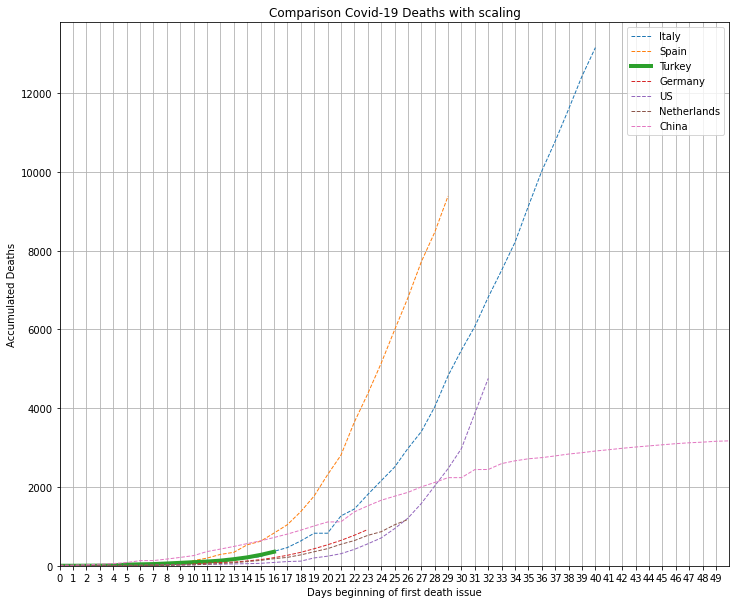

In [11]:
c=0
for i in withoutZerosData:
    
    if c ==2:
        plt.plot(i.index,i.Quantity,linewidth=4)
        c +=1
    else:    
        plt.plot(i.index,i.Quantity,linewidth=1,linestyle="--")
        plt.ylim(0,13800)
        plt.xlim(0,50)
        plt.xticks(np.arange(0, 50, step=1))
        c +=1
plt.legend( scope)
plt.title("Comparison Covid-19 Deaths with scaling")
plt.xlabel("Days beginning of first death issue")
plt.ylabel("Accumulated Deaths")
plt.grid()


   

<h2> To add Turkeys' last values manually before datasource is updated

In [9]:
x = pd.DataFrame([["4/02/20",356]],columns=["Date","Quantity"])

In [10]:
withoutZerosData[2]= withoutZerosData[2].append(x,ignore_index=True)